In [1]:
import pandas as pd

df = pd.read_csv("museum_visitors.csv")

In [2]:
# 1. Вивести перші 5 рядків датасету.
df.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [3]:
# 2. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків). 

print("Dataset size:", df.shape)
print("\nDataset data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Dataset size: (59, 5)

Dataset data types:
 Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

Missing values:
 Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [4]:
# 3. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 

df = df.drop_duplicates()
print("Dataset size without duplicates: ", df.shape)

Dataset size without duplicates:  (59, 5)


In [5]:
# 4. Про які роки містить інформацію датасет. 

years = set(df["Date"].str.split("-").str[0])
print("Years:")
for i in years:
    print(i)

Years:
2017
2014
2016
2018
2015


In [6]:
# 5. Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення

df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

In [7]:
# 6. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду. 

mean_visitors = round(df.iloc[:, 1:].mean(), 0)
print("Mean visitors value for each museum:\n", mean_visitors)

Mean visitors value for each museum:
 avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
dtype: float64


In [8]:
# 7. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 

min_visitors = df.iloc[:, 1:].min()
max_visitors = df.iloc[:, 1:].max()

print("Min visitors value for each museum:\n", min_visitors)
print("\nMax visitors value for each museum:\n", max_visitors)

Min visitors value for each museum:
 avila_adobe                             14035
firehouse_museum                         3306
chinese_american_museum                  1073
america_tropical_interpretive_center     2824
dtype: int64

Max visitors value for each museum:
 avila_adobe                             41242
firehouse_museum                        61192
chinese_american_museum                  7702
america_tropical_interpretive_center    13490
dtype: int64


In [9]:
# 8. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри). 
from calendar import month_name 

data_2015 = df[df["date"].str.split("-").str[0] == "2015"]

for column in data_2015.columns[1:]:
    min_value = data_2015[column].min()
    max_value = data_2015[column].max()
    
    worst_month = int(data_2015[data_2015[column] == min_value]["date"].str.split("-").str[1].values[0])
    best_month = int(data_2015[data_2015[column] == max_value]["date"].str.split("-").str[1].values[0])

    print(f"The best month in 2015 for {column} is {month_name[best_month]}")
    print(f"The worst month in 2015 for {column} is {month_name[worst_month]}\n")

The best month in 2015 for avila_adobe is July
The worst month in 2015 for avila_adobe is February

The best month in 2015 for firehouse_museum is May
The worst month in 2015 for firehouse_museum is February

The best month in 2015 for chinese_american_museum is May
The worst month in 2015 for chinese_american_museum is September

The best month in 2015 for america_tropical_interpretive_center is May
The worst month in 2015 for america_tropical_interpretive_center is February



In [10]:
# 9. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року 

winter_visitors = df[(df["date"].str.split("-").str[0] == "2018") & (df["date"].str.split("-").str[1].isin(["12", "01", "02"]))]["avila_adobe"].sum()
sommer_visitors = df[(df["date"].str.split("-").str[0] == "2018") & (df["date"].str.split("-").str[1].isin(["06", "07", "08"]))]["avila_adobe"].sum()

print(f"Avila Adobe had {winter_visitors} visitors in winter 2018 and {sommer_visitors} visitors in sommer 2018")

Avila Adobe had 30983 visitors in winter 2018 and 66122 visitors in sommer 2018


In [11]:
# 10. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році 

data_2016 = df[df["date"].str.split("-").str[0] == "2016"]

correlation_matrix = data_2016[data_2016.columns[1:]].corr()
correlation_matrix

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


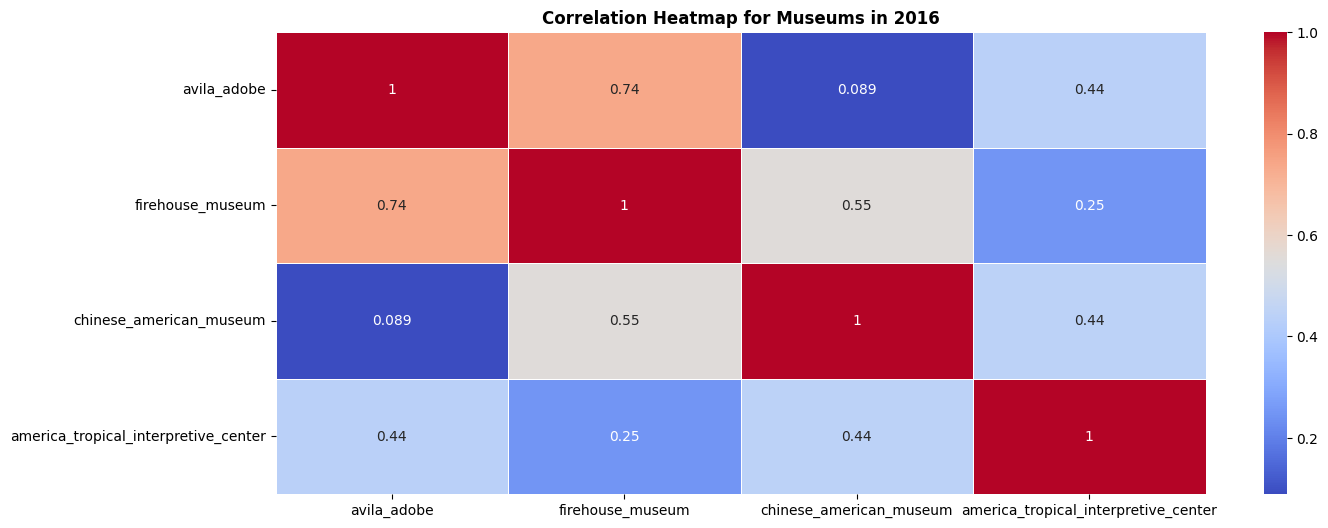

In [12]:
# 11. Побудувати теплокарту кореляції для попереднього завдання. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Museums in 2016", fontweight="bold")
plt.show()

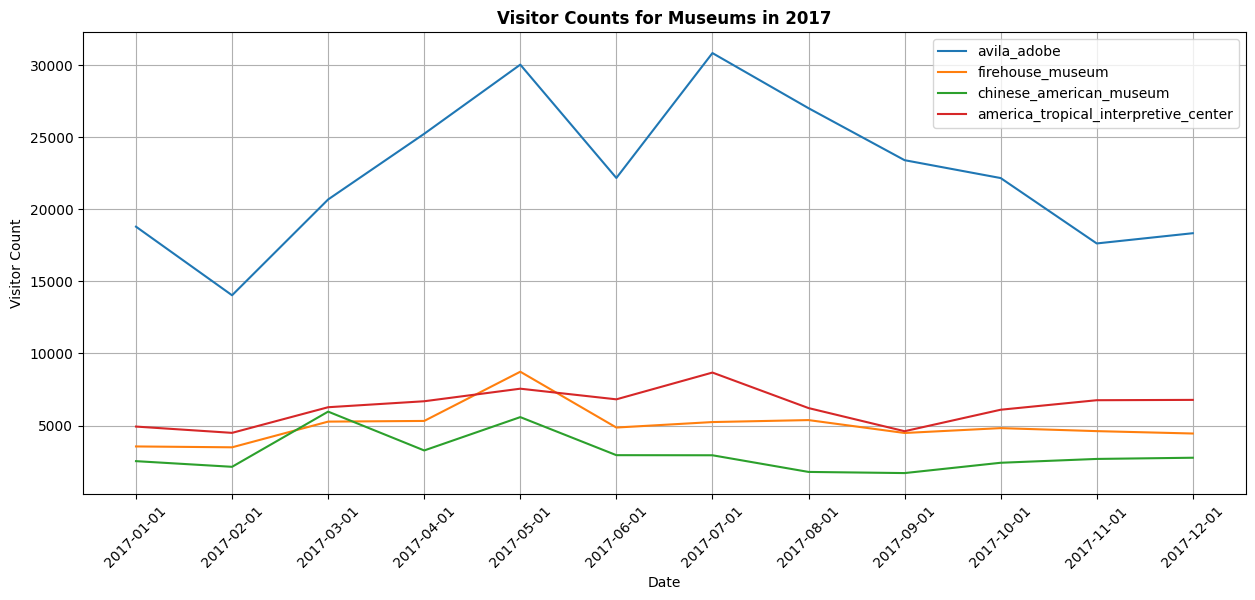

In [13]:
# 12. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року. 

museums = df.columns[1:] 

data_2017 = df[df["date"].str.split("-").str[0] == "2017"]

plt.figure(figsize=(15, 6))
for museum in museums:
    plt.plot(data_2017["date"], data_2017[museum], label=museum)

plt.title("Visitor Counts for Museums in 2017", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Visitor Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

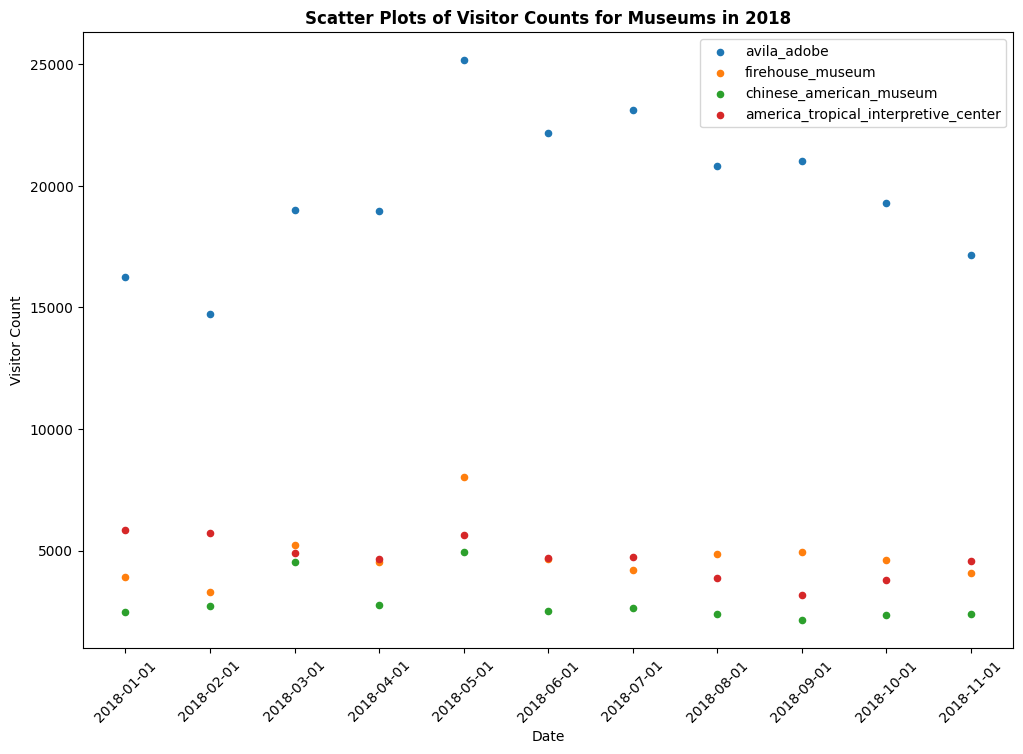

In [16]:
# 13. Побудувати графіки розсіювання для кожного музею за 2018 рік 

data_2018 = df[df["date"].str.split("-").str[0] == "2018"]

plt.figure(figsize=(12, 8))
for museum in museums:
    plt.scatter(data_2018["date"], data_2018[museum], label=museum, s=20)

plt.title("Scatter Plots of Visitor Counts for Museums in 2018", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Visitor Count")
plt.xticks(rotation=45)
plt.legend()

plt.show()

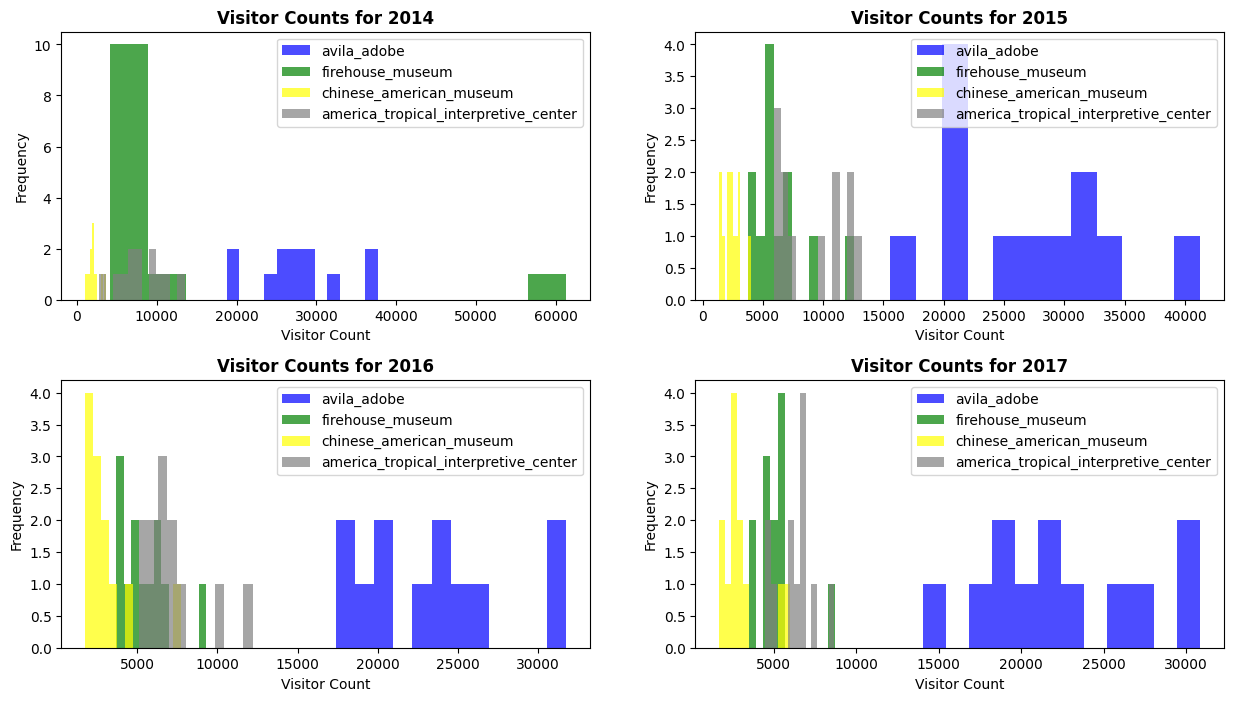

In [15]:
# 14. Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. 
# Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

colors = ['blue', 'green', 'yellow', 'gray']
years = ["2014", "2015", "2016", "2017"]

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)

for i, year in enumerate(years):
    data_year = df[df["date"].str.split("-").str[0] == year]
    
    for j, museum in enumerate(museums):
        
        museum_data = data_year[museum]
        
        ax = axs[i // 2, i % 2]
        
        ax.hist(museum_data, bins=12, color=colors[j], alpha=0.7, label=museum)
        
        ax.set_title(f"Visitor Counts for {year}", fontweight="bold")
        ax.set_xlabel("Visitor Count")
        ax.set_ylabel("Frequency")
        ax.legend()
        
plt.show()